# <span style="color:darkblue"> Laboratorio di Simulazione Numerica </span>
#### <span style="color:darkred">  Andrea Sala - Settembre 2020</span>
# <span style="color:darkgreen">  Esercitazione 12</span>

## Esercizio 12.1

By keeping fixed all the other parameters, try to use at least two other optimizers, different from SGD. <span style="color:red">Watch to accuracy and loss for training and validation data and comment on the performances</span>.

In questo esercizio si fa utilizzo del database di cifre scritte a mano MNIST per allenare una rete neurale profonda a riconoscere appunto le cifre. 
La rete neurale utilizzata è composta da 2 layer nascosti più quello di input (di 256 neuroni, tanti quanti i pixel dell'immagine) e quello di output (10 neuroni, come le possibili cifre). Inoltre, è presente un layer di Dropout che con probabilità 0.5 spegne alcuni collegamenti evitando di far finire il prpcesso di minimizzazione della loss in un minimo locale. In particolare, ho analizzato le performance della rete mantenendo costanti tutti i parametri e cambiando solo l'ottimizzatore. Ogni ottimizzatore è stato testato sulle stesse 10 cifre, assegnando uno score da 1 a 10 in base al numero di cifre riconosciute correttamente. Al termine dell'allenamento gli ottimizzatori che si sono rivelati più affidabili sono *RMSprop* e *Nadam*. Tutti i grafici della accuracy e della loss della rete presentano andamenti simili.

In [5]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.datasets import mnist

In [6]:
num_classes = 10 # 10 digits
batch_size = 32
epochs = 5

def do_everything_with_opt(optim):

    img_rows, img_cols = 28, 28 # number of pixels
    
    (X_train, Y_train), (X_test, Y_test) = mnist.load_data()

    print('X_train shape:', X_train.shape)
    print('Y_train shape:', Y_train.shape)
    print()
    print(X_train.shape[0], 'train samples')
    print(X_test.shape[0], 'test samples')

    # reshape data, it could depend on Keras backend
    X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
    X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')

    # rescale data in interval [0,1]
    X_train /= 255
    X_test /= 255
    
    Y_train = keras.utils.to_categorical(Y_train, num_classes)
    Y_test = keras.utils.to_categorical(Y_test, num_classes)

    model = Sequential()
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=optim(),
                  metrics=['accuracy'])
 
    history = model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_data=(X_test, Y_test))

    score = model.evaluate(X_test, Y_test, verbose=2)

    print()
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

    fig, axs = plt.subplots(1,2,figsize=(14,4))
    
    axs[0].plot(history.history['accuracy'])
    axs[0].plot(history.history['val_accuracy'])
    axs[0].set_ylabel('model accuracy')
    axs[0].set_xlabel('epoch')
    axs[0].legend(['train', 'test'], loc='best')

    axs[1].plot(history.history['loss'])
    axs[1].plot(history.history['val_loss'])
    axs[1].set_ylabel('model loss')
    axs[1].set_xlabel('epoch')
    axs[1].legend(['train', 'test'], loc='best')
    
    plt.show()

    predictions = model.predict(X_test)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

    plt.figure(figsize=(15, 15)) 
    for i in range(10):    
        ax = plt.subplot(2, 10, i + 1)    
        plt.imshow(X_test[i, :, :, 0], cmap='gray')    
        plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
        plt.axis('off') 
    plt.show()

### Exercise 12.1

By keeping fixed all the other parameters, try to use at least two other optimizers, different from SGD. <span style="color:black">Watch to accuracy and loss for training and validation data and comment on the performances</span>.

#### *Adam* optimizer (Score: 9/10)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples
Epoch 1/5
1875/1875 - 4s - loss: 0.2903 - accuracy: 0.9147 - val_loss: 0.1159 - val_accuracy: 0.9636
Epoch 2/5
1875/1875 - 4s - loss: 0.1267 - accuracy: 0.9642 - val_loss: 0.0887 - val_accuracy: 0.9723
Epoch 3/5
1875/1875 - 4s - loss: 0.0901 - accuracy: 0.9735 - val_loss: 0.0859 - val_accuracy: 0.9742
Epoch 4/5
1875/1875 - 4s - loss: 0.0693 - accuracy: 0.9796 - val_loss: 0.0783 - val_accuracy: 0.9776
Epoch 5/5
1875/1875 - 5s - loss: 0.0562 - accuracy: 0.9833 - val_loss: 0.0730 - val_accuracy: 0.9799
313/313 - 0s - loss: 0.0730 - accuracy: 0.9799

Test loss: 0.0730464980006218
Test accuracy: 0.9799000024795532


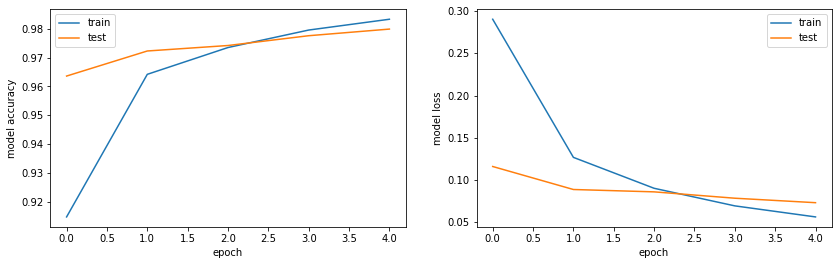

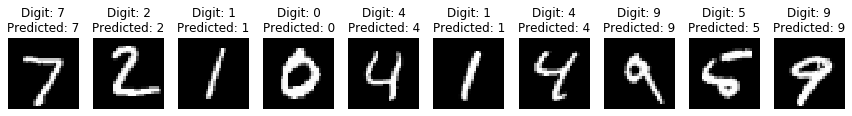

In [7]:
chosen_opt = Adam
do_everything_with_opt(chosen_opt)

#### *SGD* optimizer (Score: 9/10)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples
Epoch 1/5
1875/1875 - 5s - loss: 0.7583 - accuracy: 0.7767 - val_loss: 0.3147 - val_accuracy: 0.9150
Epoch 2/5
1875/1875 - 4s - loss: 0.3830 - accuracy: 0.8928 - val_loss: 0.2390 - val_accuracy: 0.9320
Epoch 3/5
1875/1875 - 5s - loss: 0.3088 - accuracy: 0.9121 - val_loss: 0.2017 - val_accuracy: 0.9393
Epoch 4/5
1875/1875 - 4s - loss: 0.2637 - accuracy: 0.9249 - val_loss: 0.1783 - val_accuracy: 0.9474
Epoch 5/5
1875/1875 - 4s - loss: 0.2321 - accuracy: 0.9341 - val_loss: 0.1571 - val_accuracy: 0.9527
313/313 - 0s - loss: 0.1571 - accuracy: 0.9527

Test loss: 0.15714772045612335
Test accuracy: 0.9527000188827515


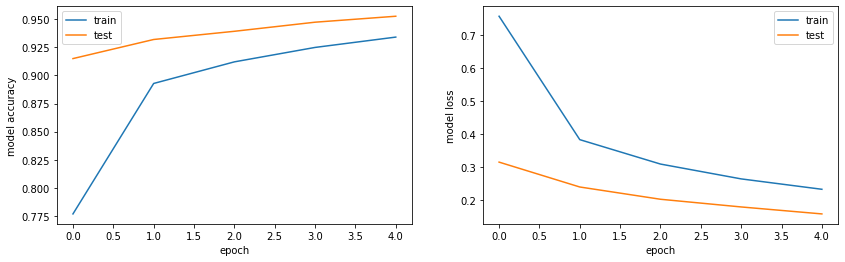

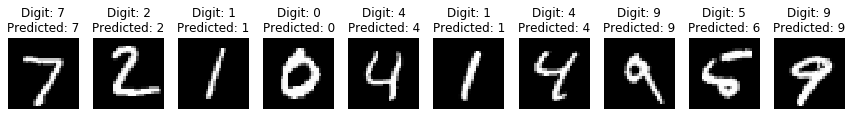

In [8]:
chosen_opt = SGD
do_everything_with_opt(chosen_opt)

#### RMSprop optimizer (Score: 10/10)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples
Epoch 1/5
1875/1875 - 6s - loss: 0.2808 - accuracy: 0.9183 - val_loss: 0.1215 - val_accuracy: 0.9655
Epoch 2/5
1875/1875 - 6s - loss: 0.1492 - accuracy: 0.9628 - val_loss: 0.1219 - val_accuracy: 0.9735
Epoch 3/5
1875/1875 - 6s - loss: 0.1383 - accuracy: 0.9688 - val_loss: 0.1465 - val_accuracy: 0.9716
Epoch 4/5
1875/1875 - 5s - loss: 0.1395 - accuracy: 0.9708 - val_loss: 0.1546 - val_accuracy: 0.9733
Epoch 5/5
1875/1875 - 6s - loss: 0.1448 - accuracy: 0.9715 - val_loss: 0.1530 - val_accuracy: 0.9750
313/313 - 0s - loss: 0.1530 - accuracy: 0.9750

Test loss: 0.15301597118377686
Test accuracy: 0.9750000238418579


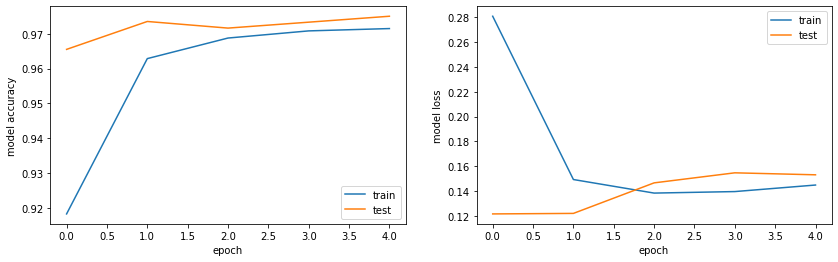

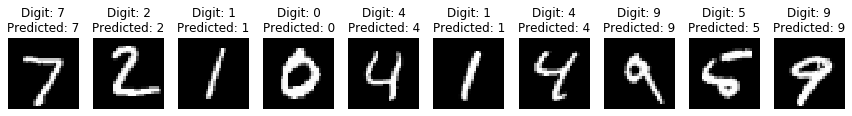

In [9]:
chosen_opt = RMSprop
do_everything_with_opt(chosen_opt)

#### Adadelta optimizer (Score: 6/10)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples
Epoch 1/5
1875/1875 - 5s - loss: 2.2485 - accuracy: 0.1779 - val_loss: 2.1380 - val_accuracy: 0.3414
Epoch 2/5
1875/1875 - 4s - loss: 2.1026 - accuracy: 0.3059 - val_loss: 1.9820 - val_accuracy: 0.5374
Epoch 3/5
1875/1875 - 4s - loss: 1.9522 - accuracy: 0.4244 - val_loss: 1.8131 - val_accuracy: 0.6431
Epoch 4/5
1875/1875 - 4s - loss: 1.8013 - accuracy: 0.5049 - val_loss: 1.6451 - val_accuracy: 0.7068
Epoch 5/5
1875/1875 - 4s - loss: 1.6582 - accuracy: 0.5586 - val_loss: 1.4867 - val_accuracy: 0.7449
313/313 - 0s - loss: 1.4867 - accuracy: 0.7449

Test loss: 1.4867305755615234
Test accuracy: 0.7448999881744385


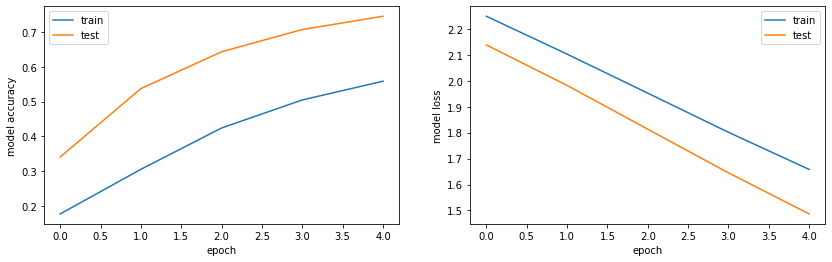

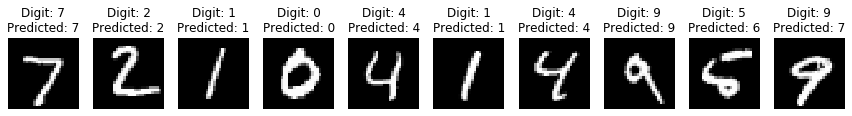

In [10]:
chosen_opt = Adadelta
do_everything_with_opt(chosen_opt)

#### Nadam optimizer (Score: 10/10)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples
Epoch 1/5
1875/1875 - 7s - loss: 0.2725 - accuracy: 0.9205 - val_loss: 0.1009 - val_accuracy: 0.9666
Epoch 2/5
1875/1875 - 7s - loss: 0.1176 - accuracy: 0.9655 - val_loss: 0.0871 - val_accuracy: 0.9738
Epoch 3/5
1875/1875 - 8s - loss: 0.0871 - accuracy: 0.9749 - val_loss: 0.0724 - val_accuracy: 0.9777
Epoch 4/5
1875/1875 - 6s - loss: 0.0696 - accuracy: 0.9795 - val_loss: 0.0704 - val_accuracy: 0.9793
Epoch 5/5
1875/1875 - 6s - loss: 0.0564 - accuracy: 0.9834 - val_loss: 0.0817 - val_accuracy: 0.9778
313/313 - 0s - loss: 0.0817 - accuracy: 0.9778

Test loss: 0.0817050188779831
Test accuracy: 0.9778000116348267


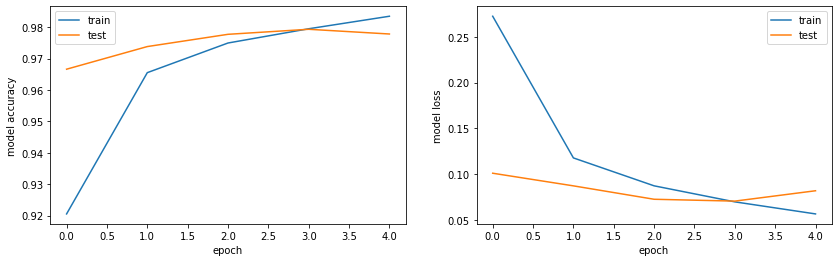

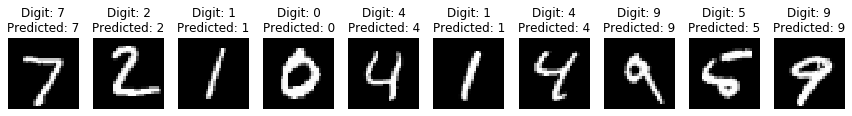

In [11]:
chosen_opt= Nadam
do_everything_with_opt(chosen_opt)

## Esercizio 12.2

Change the architecture of your DNN using convolutional layers. Use `Conv2D`, `MaxPooling2D`, `Dropout`, but also do not forget `Flatten`, a standard `Dense` layer and `softmax` in the end. 

L'esercizio richiede di cambiare l'architettura della rete, facendola diventare una *Convolutional Neural Network*. Questo comporta la presenza di layer convoluzionali, ovvero layer composti da multipli sottolayer che operano una convoluzione (con determinati filtri), ovvero i valori nei neuroni del layer successivo dipendono dal valore di una determinata cella in tutti i suoi sottolayer. Sono anche presenti layer di *pooling*, che estraggono da un set di dati il maggiore e lo riportano nel layer successivo. L'ultimo layer convoluzionale viene poi "srotolato" con la funzione `Flatten()` e infine viene aggiunto un layer di output con 10 neuroni, tanti quanti i possibili esiti della predizione. L'ultimo layer ha funzione di attivazione `softmax` perchè essa rappresenta la probabilità di ottenere una determinata cifra. Una volta costruita l'architettura della rete, il processo di training e di predizione è identico a quello di una Deep Neural Network.

In [12]:
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
img_rows, img_cols = 28, 28 # number of pixels 

# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
    
# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255
    
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [13]:
def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(6, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None))
    model.add(Conv2D(16, kernel_size=(5,5),activation='tanh'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=None))
    model.add(Flatten())
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(num_classes, activation='softmax'))
 
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='Adam',
                  metrics=['accuracy'])
    return model

In [14]:
model_CNN=create_CNN()
history=model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1798 - accuracy: 0.9456 - val_loss: 0.0543 - val_accuracy: 0.9830
Epoch 2/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0656 - accuracy: 0.9797 - val_loss: 0.0450 - val_accuracy: 0.9863
Epoch 3/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0504 - accuracy: 0.9836 - val_loss: 0.0379 - val_accuracy: 0.9877
Epoch 4/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0397 - accuracy: 0.9876 - val_loss: 0.0301 - val_accuracy: 0.9899
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0316 - accuracy: 0.9902

Test loss: 0.031636882573366165
Test accuracy: 0.9901999831199646


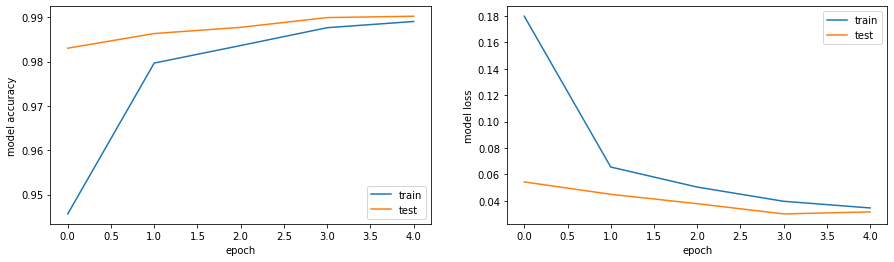

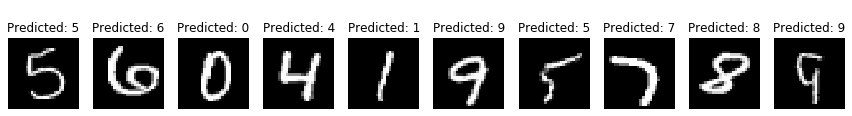

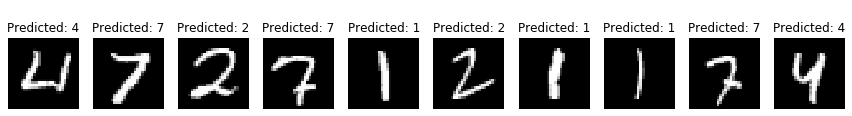

In [15]:
fig, axs = plt.subplots(1,2, figsize=(15,4))

axs[0].plot(history.history['accuracy'])
axs[0].plot(history.history['val_accuracy'])
axs[0].set_ylabel('model accuracy')
axs[0].set_xlabel('epoch')
axs[0].legend(['train', 'test'], loc='best')

axs[1].plot(history.history['loss'])
axs[1].plot(history.history['val_loss'])
axs[1].set_ylabel('model loss')
axs[1].set_xlabel('epoch')
axs[1].legend(['train', 'test'], loc='best')
plt.show()

predictions = model_CNN.predict(X_test)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i+53, :, :, 0], cmap='gray')    
    plt.title("\nPredicted: {}".format(np.argmax(Y_test[i+53]), np.argmax(predictions[i+53])))    
    plt.axis('off') 
plt.show()
plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i+33, :, :, 0], cmap='gray')    
    plt.title("\nPredicted: {}".format(np.argmax(Y_test[i+33]), np.argmax(predictions[i+33])))    
    plt.axis('off') 
plt.show()
  

Come si osserva qui sopra, la rete convoluzionale ha delle ottime prestazioni, infatti è in grado di leggere correttamente tutti e 20 i numeri che ho estratto dal dataset di MINST.

## Esercizio 13.3

Use the `gimp` application to create 10 pictures of your "handwritten" digits, import them in your jupyter-notebook and try to see if your CNN is able to recognize your handwritten digits.

Ho semplicemente utilizzato la rete convoluzionale dell'esercizio 12.2 dando in input le cifre scritte a mano da me.

In [16]:
from PIL import Image
import os

digit_filename = "digits/digit0.png"
digit_in = Image.open(digit_filename).convert('L')

ydim, xdim = digit_in.size
#print("Image size: "+str(xdim)+"x"+str(ydim))
pix=digit_in.load();
data = np.zeros((10,xdim, ydim))
for j in range(ydim):
    for i in range(xdim):
        data[0,i,j]=pix[j,i]/255
        
digit_filename = "digits/digit1.png"
digit_in = Image.open(digit_filename).convert('L')
pix=digit_in.load();
for j in range(ydim):
    for i in range(xdim):
        data[1,i,j]=pix[j,i]/255
        
digit_filename ="digits/digit2.png"
digit_in = Image.open(digit_filename).convert('L')
pix=digit_in.load();
for j in range(ydim):
    for i in range(xdim):
        data[2,i,j]=pix[j,i]/255
        
digit_filename = "digits/digit3.png"
digit_in = Image.open(digit_filename).convert('L')
pix=digit_in.load();
for j in range(ydim):
    for i in range(xdim):
        data[3,i,j]=pix[j,i]/255

        
digit_filename = "digits/digit4.png"
digit_in = Image.open(digit_filename).convert('L')
pix=digit_in.load();
for j in range(ydim):
    for i in range(xdim):
        data[4,i,j]=pix[j,i]/255
        
digit_filename = "digits/digit5.png"
digit_in = Image.open(digit_filename).convert('L')
pix=digit_in.load();
for j in range(ydim):
    for i in range(xdim):
        data[5,i,j]=pix[j,i]/255
        
digit_filename = "digits/digit6.png"
digit_in = Image.open(digit_filename).convert('L')
pix=digit_in.load();
for j in range(ydim):
    for i in range(xdim):
        data[6,i,j]=pix[j,i]/255
        
digit_filename = "digits/digit7.png"
digit_in = Image.open(digit_filename).convert('L')
pix=digit_in.load();
for j in range(ydim):
    for i in range(xdim):
        data[7,i,j]=pix[j,i]/255
        
digit_filename = "digits/digit8.png"
digit_in = Image.open(digit_filename).convert('L')
pix=digit_in.load();
for j in range(ydim):
    for i in range(xdim):
        data[8,i,j]=pix[j,i]/255
        
digit_filename = "digits/digit9.png"
digit_in = Image.open(digit_filename).convert('L')
pix=digit_in.load();
for j in range(ydim):
    for i in range(xdim):
        data[9,i,j]=pix[j,i]/255


In [17]:
if keras.backend.image_data_format() == 'channels_first':
    data = data.reshape(data.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    data = data.reshape(data.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

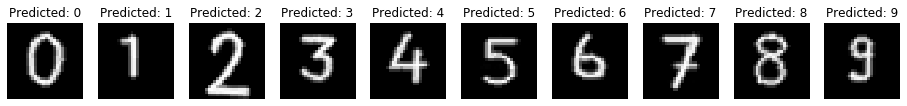

In [18]:
predictions = model_CNN.predict(data)
plt.figure(figsize=(16, 5)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(data[i, :, :, 0], cmap='gray')    
    plt.title("Predicted: {}".format(np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

## 100% accuracy!